# Fashion MNIST Data classification using CNN
## - Ashwin Prakash

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.keras

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [5]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [6]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
y_train[0]

9

In [9]:
'''
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
'''

'\n0\tT-shirt/top\n1\tTrouser\n2\tPullover\n3\tDress\n4\tCoat\n5\tSandal\n6\tShirt\n7\tSneaker\n8\tBag\n9\tAnkle boot\n'

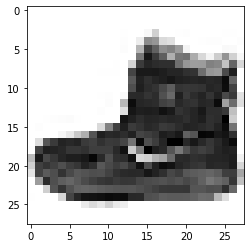

In [11]:
# show image
plt.imshow(X_train[0],cmap='Greys')

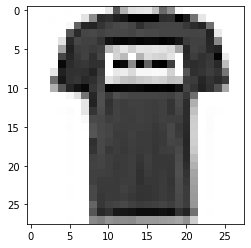

In [12]:
plt.imshow(X_train[1],cmap='Greys')

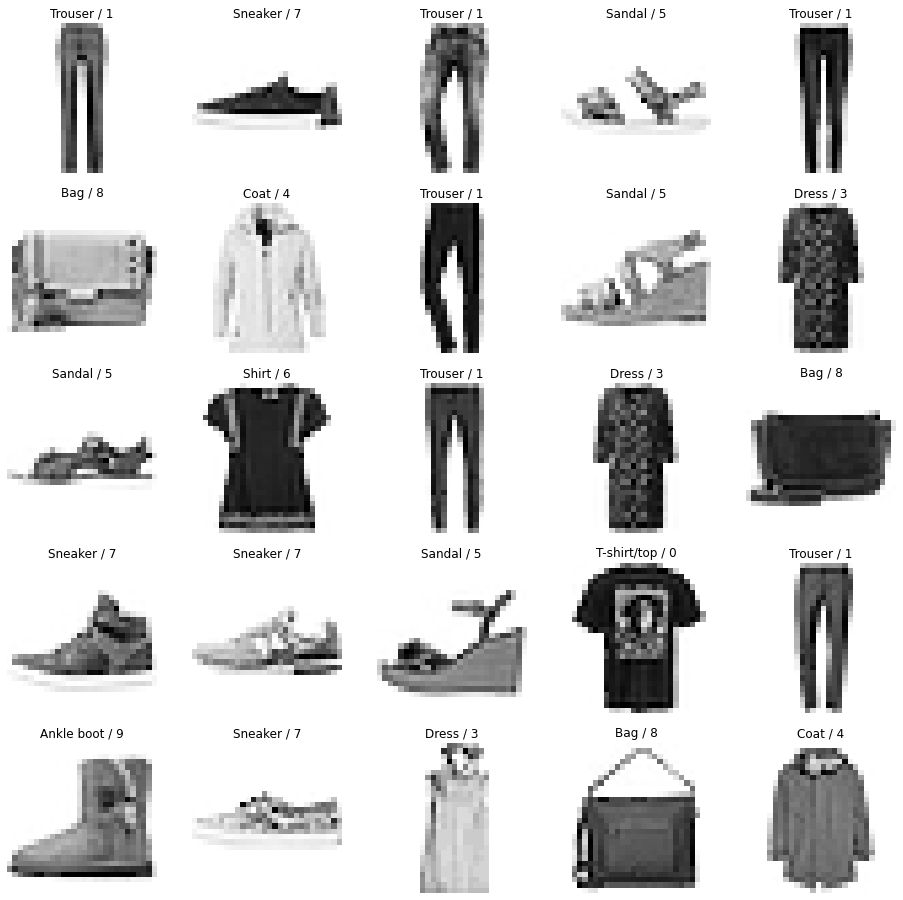

In [13]:
class_labels = ["T-shirt/top","Trouser",	"Pullover","Dress","Coat",	"Sandal",	"Shirt",	"Sneaker",	"Bag",	"Ankle boot"]
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
    plt.subplot(5,5,j); j+=1
    plt.imshow(X_train[i],cmap="Greys")
    plt.axis('off')
    plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [14]:
X_train.shape

(60000, 28, 28)

In [15]:
X_train.ndim

3

In [16]:
X_train = np.expand_dims(X_train,-1)

In [17]:
X_train.shape

(60000, 28, 28, 1)

In [18]:
X_train.ndim

4

## Feature Scaling 

In [20]:
X_train[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [21]:
X_train = X_train/255
X_test= X_test/255

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_validation,y_train,y_validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [23]:
X_train.shape,X_validation.shape,y_train.shape,y_validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

## Build CNN Model

In [26]:
model=tf.keras.models.Sequential([
                         tf.keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                         tf.keras.layers.Flatten(),
                         tf.keras.layers.Dense(units=128,activation='relu'),
                         tf.keras.layers.Dense(units=10,activation='softmax')
])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [29]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_validation,y_validation))

Epoch 1/10
94/94 [==============================] - 12s 121ms/step - loss: 0.6489 - accuracy: 0.7834 - val_loss: 0.4311 - val_accuracy: 0.8527
Epoch 2/10
94/94 [==============================] - 11s 118ms/step - loss: 0.3905 - accuracy: 0.8640 - val_loss: 0.3842 - val_accuracy: 0.8654
Epoch 3/10
94/94 [==============================] - 11s 118ms/step - loss: 0.3435 - accuracy: 0.8794 - val_loss: 0.3500 - val_accuracy: 0.8771
Epoch 4/10
94/94 [==============================] - 11s 122ms/step - loss: 0.3119 - accuracy: 0.8890 - val_loss: 0.3165 - val_accuracy: 0.8902
Epoch 5/10
94/94 [==============================] - 11s 119ms/step - loss: 0.2944 - accuracy: 0.8946 - val_loss: 0.3083 - val_accuracy: 0.8910
Epoch 6/10
94/94 [==============================] - 12s 126ms/step - loss: 0.2762 - accuracy: 0.9018 - val_loss: 0.2985 - val_accuracy: 0.8947
Epoch 7/10
94/94 [==============================] - 12s 123ms/step - loss: 0.2584 - accuracy: 0.9085 - val_loss: 0.2827 - val_accuracy: 0.9017

In [31]:
X_test = np.expand_dims(X_test,-1)
y_pred = model.predict(X_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.04, 0.  , 0.95],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.14, 0.06, 0.  ]], dtype=float32)

In [32]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [33]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2826 - accuracy: 0.8960


[0.282566636800766, 0.8960000276565552]

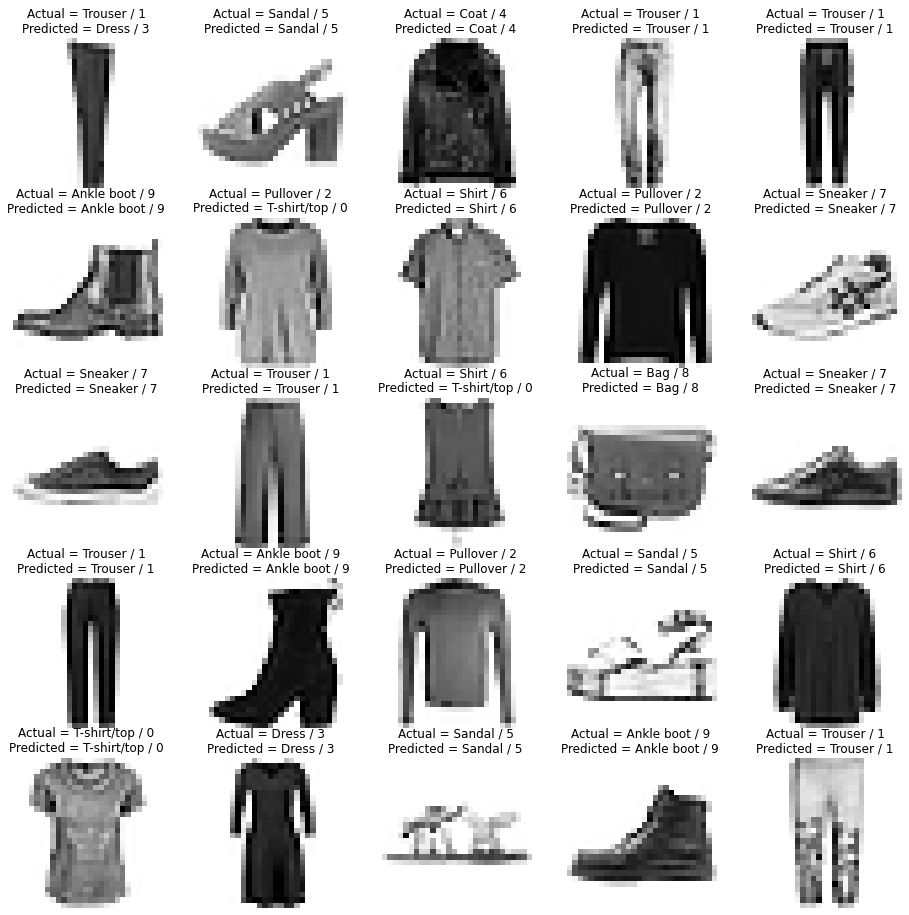

In [36]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000,25):
    plt.subplot(5,5, j); j+=1
    plt.imshow(X_test[i].reshape(28,28),cmap = 'Greys')
    plt.title('Actual = {} / {} \nPredicted = {} / {} '.format(class_labels[y_test[i]],y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
    plt.axis('off')

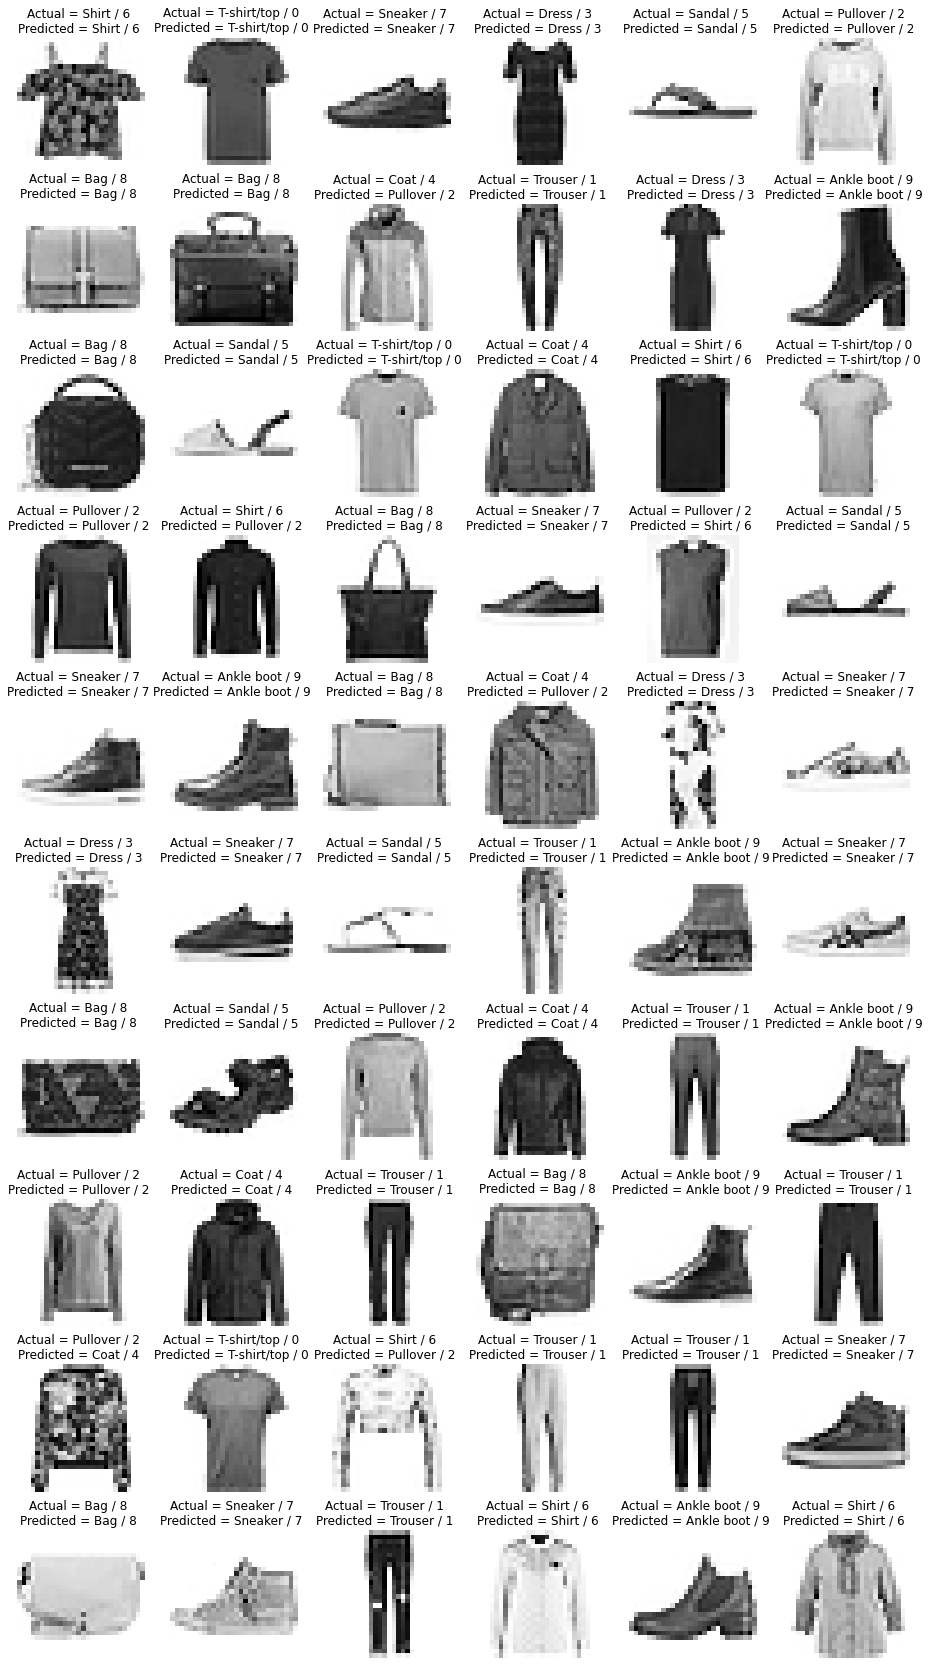

In [37]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
    plt.subplot(10,6, j); j+=1
    plt.imshow(X_test[i].reshape(28,28),cmap = 'Greys')
    plt.title('Actual = {} / {} \nPredicted = {} / {} '.format(class_labels[y_test[i]],y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
    plt.axis('off')

## Confusion matrix

In [39]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.87      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.79      0.89      0.84      1000
       Dress       0.86      0.94      0.90      1000
        Coat       0.88      0.78      0.83      1000
      Sandal       0.99      0.96      0.98      1000
       Shirt       0.78      0.64      0.70      1000
     Sneaker       0.93      0.98      0.96      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.97      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.89     10000
weighted avg       0.90      0.90      0.89     10000



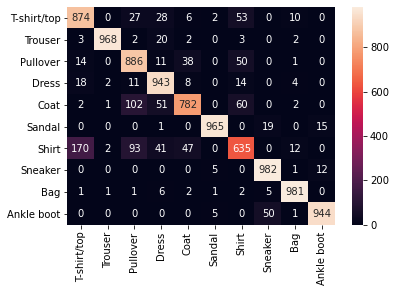

In [40]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels = class_labels)

from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_labels, target_names = class_labels)
print(cr)

## Save model

In [42]:
model.save('fashion_mnist_cnn_model.h5')

## Build 2: Complex CNN

In [47]:
cnn_model2 = tf.keras.models.Sequential([
    
        tf.keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same',activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=128,activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(units=256,activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(units=128,activation='relu'),
        tf.keras.layers.Dense(units=10,activation='softmax'),
        ])
cnn_model2.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model2.fit(X_train, y_train , epochs=20, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))
cnn_model2.save('fashion_mnist_cnn_model2.h5')

"# very complex model"
cnn_model3 = tf.keras.models.Sequential([
    
        tf.keras.layers.Conv2D(filters=64,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same',activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same',activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=128,activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(units=256,activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=256,activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(units=128,activation='relu'),
        tf.keras.layers.Dense(units=10,activation='softmax'),
        ])
cnn_model3.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model3.fit(X_train, y_train , epochs=50, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))
cnn_model3.save('fashion_mnist_cnn_model3.h5')


Epoch 1/20
94/94 [==============================] - 16s 166ms/step - loss: 1.0278 - accuracy: 0.6083 - val_loss: 0.5869 - val_accuracy: 0.7659
Epoch 2/20
94/94 [==============================] - 16s 168ms/step - loss: 0.5607 - accuracy: 0.7850 - val_loss: 0.4973 - val_accuracy: 0.8106
Epoch 3/20
94/94 [==============================] - 15s 161ms/step - loss: 0.4780 - accuracy: 0.8216 - val_loss: 0.4285 - val_accuracy: 0.8444
Epoch 4/20
94/94 [==============================] - 15s 161ms/step - loss: 0.4202 - accuracy: 0.8455 - val_loss: 0.3885 - val_accuracy: 0.8541
Epoch 5/20
94/94 [==============================] - 15s 161ms/step - loss: 0.3881 - accuracy: 0.8581 - val_loss: 0.3552 - val_accuracy: 0.8708
Epoch 6/20
94/94 [==============================] - 15s 164ms/step - loss: 0.3599 - accuracy: 0.8687 - val_loss: 0.3424 - val_accuracy: 0.8737
Epoch 7/20
94/94 [==============================] - 17s 182ms/step - loss: 0.3391 - accuracy: 0.8757 - val_loss: 0.3224 - val_accuracy: 0.8821

94/94 [==============================] - 29s 312ms/step - loss: 0.0699 - accuracy: 0.9751 - val_loss: 0.4493 - val_accuracy: 0.9017
Epoch 39/50
94/94 [==============================] - 30s 323ms/step - loss: 0.0750 - accuracy: 0.9729 - val_loss: 0.4043 - val_accuracy: 0.9048
Epoch 40/50
94/94 [==============================] - 27s 284ms/step - loss: 0.0679 - accuracy: 0.9760 - val_loss: 0.4133 - val_accuracy: 0.9048
Epoch 41/50
94/94 [==============================] - 26s 277ms/step - loss: 0.0673 - accuracy: 0.9765 - val_loss: 0.4134 - val_accuracy: 0.9051
Epoch 42/50
94/94 [==============================] - 25s 269ms/step - loss: 0.0628 - accuracy: 0.9776 - val_loss: 0.4629 - val_accuracy: 0.9043
Epoch 43/50
94/94 [==============================] - 26s 272ms/step - loss: 0.0649 - accuracy: 0.9764 - val_loss: 0.4470 - val_accuracy: 0.9087
Epoch 44/50
94/94 [==============================] - 25s 268ms/step - loss: 0.0608 - accuracy: 0.9781 - val_loss: 0.4842 - val_accuracy: 0.8969
Epoc